In [40]:
import requests, json
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import datetime

### BITCOIN KZENGINE SIGNAL ANALYSIS

In [41]:
payload = {"ticker":"btc"}
url = "https://4f37-161-97-89-37.ngrok-free.app/signals_ticker"
result = requests.post(url=url, json=payload)

In [42]:
data = json.loads(result.text)
df = pd.DataFrame(data)
df.datetime_t = pd.to_datetime(df.datetime_t)
df.set_index(df.datetime_t, drop=True, inplace=True)
df.index = df.index - datetime.timedelta(hours=3)
df = df.drop(axis=1, columns=['datetime_t'])
df.sort_index(inplace=True)
df_hourly = df[df.apply(lambda row: row.forecast_model['interval'] != '1d', axis=1)]
df_hourly.tail()

,backtest_returns_data,forecast_model,japanese_candle,signal,ticker,tweet_counts
datetime_t,,,,,,
2023-08-07 05:00:00+00:00,"{st_ema_5,st_ema_6,st_willr_8_pct,log_return,s...","{'accuracy_score': 0.5613660618996799, 'ai_typ...",CDLDOJI_Bull,0,btc,0
2023-08-07 06:00:00+00:00,"{st_ema_5,st_ema_6,log_return,st_adxdmi_7,st_c...","{'accuracy_score': 0.5602988260405549, 'ai_typ...",CDLMATCHINGLOW_Bull,1,btc,0
2023-08-07 07:00:00+00:00,"{st_ema_5,st_ema_6,log_return,st_adxdmi_7,st_c...","{'accuracy_score': 0.5656350053361793, 'ai_typ...",CDLDOJI_Bull,1,btc,0
2023-08-07 08:00:00+00:00,"{st_ema_5,st_ema_6,log_return,st_willr_6_pct,s...","{'accuracy_score': 0.5720384204909285, 'ai_typ...",CDLDOJI_Bull,1,btc,0
2023-08-07 09:00:00+00:00,"{st_ema_5,st_ema_6,log_return,st_adxdmi_9,st_c...","{'accuracy_score': 0.5709711846318036, 'ai_typ...",CDLMATCHINGLOW_Bull,1,btc,0


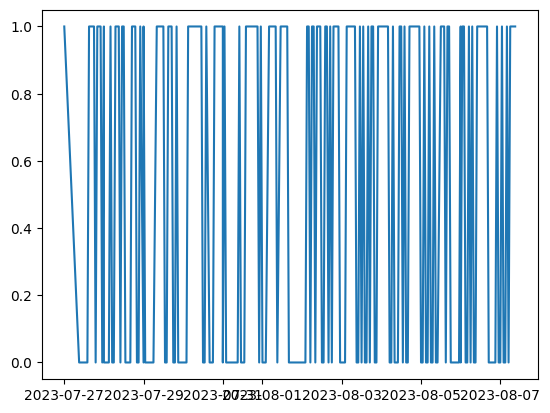

In [43]:
plt.plot(df.index, df['signal'])

In [44]:
df_hourly.forecast_model.iloc[0]['interval']

'1h'

[*********************100%***********************]  1 of 1 completed


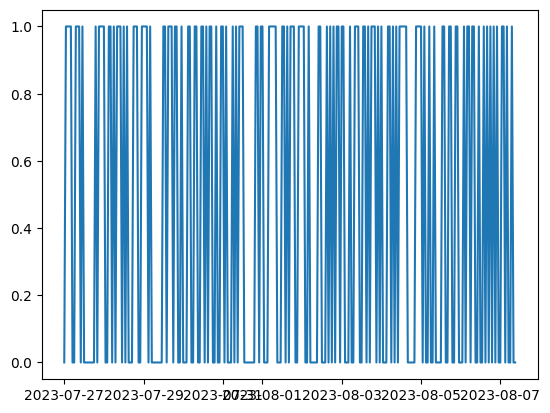

In [45]:
btc_yf = yf.download('BTC-USD', start="2023-07-27", interval='1h')
btc_yf['act_signal'] = np.where(btc_yf['Close'].pct_change() > 0, 1, 0)
btc_yf['pct'] = btc_yf.Close.pct_change()
plt.plot(btc_yf.index, btc_yf["act_signal"])

In [46]:
btc_yf.info(), df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2023-07-27 00:00:00+00:00 to 2023-08-07 09:00:00+00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        274 non-null    float64
 1   High        274 non-null    float64
 2   Low         274 non-null    float64
 3   Close       274 non-null    float64
 4   Adj Close   274 non-null    float64
 5   Volume      274 non-null    int64  
 6   act_signal  274 non-null    int64  
 7   pct         273 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 19.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2023-07-27 09:00:00+00:00 to 2023-08-07 09:00:00+00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   backtest_returns_data  256 non-null    object
 1   forecast_model         256 non-null    object
 2   japanese_candle        2

(None, None)

In [50]:
btc_yf.loc[df_hourly.index, 'signal'] = df_hourly['signal']
btc_yf = btc_yf.dropna()

In [51]:
btc_yf

,Open,High,Low,Close,Adj Close,Volume,act_signal,pct,signal
Datetime,,,,,,,,,
2023-07-27 09:00:00+00:00,29459.216797,29560.966797,29459.216797,29551.265625,29551.265625,81599488,1,0.003152,0.0
2023-07-27 10:00:00+00:00,29546.113281,29552.125000,29480.312500,29482.810547,29482.810547,102379520,0,-0.002316,0.0
2023-07-27 11:00:00+00:00,29490.933594,29520.707031,29478.330078,29505.267578,29505.267578,0,1,0.000762,0.0
2023-07-27 12:00:00+00:00,29508.166016,29508.166016,29464.062500,29489.669922,29489.669922,26038272,0,-0.000529,0.0
2023-07-27 13:00:00+00:00,29492.818359,29501.738281,29443.453125,29446.339844,29446.339844,0,0,-0.001469,0.0
...,...,...,...,...,...,...,...,...,...
2023-08-07 05:00:00+00:00,29127.900391,29130.994141,29072.750000,29072.750000,29072.750000,57640448,0,-0.002015,0.0
2023-08-07 06:00:00+00:00,29075.462891,29075.462891,29002.187500,29004.251953,29004.251953,55748096,0,-0.002356,1.0
2023-08-07 07:00:00+00:00,28996.595703,29055.523438,28995.246094,29032.416016,29032.416016,78185984,1,0.000971,1.0


147

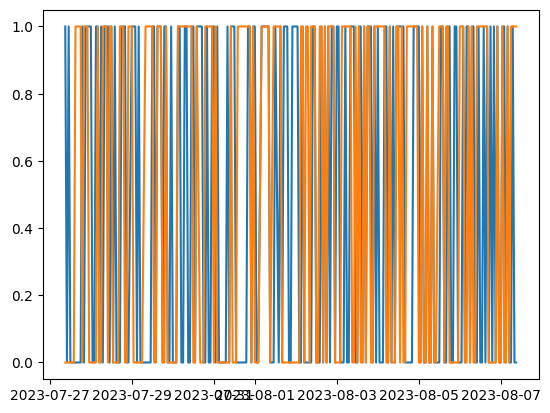

In [52]:
plt.plot(btc_yf.index, btc_yf["act_signal"])
plt.plot(btc_yf.index, btc_yf["signal"])
(btc_yf["act_signal"] == btc_yf["signal"]).sum()